In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

In [ ]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)

68606236/68606236 [==============================] - 2s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)

In [ ]:
zip_dir_base
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')

In [ ]:
base_dir

'/root/.keras/datasets/cats_and_dogs_filtered'

In [ ]:
train_dir  = os.path.join(base_dir,'train')

In [ ]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [ ]:
validation_dir = os.path.join(base_dir,'validation')

In [ ]:
validation_dir

'/root/.keras/datasets/cats_and_dogs_filtered/validation'

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
train_dogs_dir = os.path.join(train_dir,'dogs')

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr+num_dogs_tr
total_val = num_cats_val+num_dogs_val
print('total training cats images: ',num_cats_tr)
print('total training dogs images: ',num_dogs_tr)
print('total validation cats images: ',num_cats_val)
print('total validation dogs images:  ',num_dogs_val)
print('Total training Images: ',total_train)
print('Total Validation Images: ',total_val)

total training cats images:  1000
total training dogs images:  1000
total validation cats images:  500
total validation dogs images:   500
Total training Images:  2000
Total Validation Images:  1000


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(
batch_size=BATCH_SIZE,
directory=train_dir,
shuffle=True,
target_size=(IMG_SHAPE,IMG_SHAPE),
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                shuffle=False,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images,_ = next(train_data_gen)

In [ ]:
sample_training_images.shape

(100, 150, 150, 3)

In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

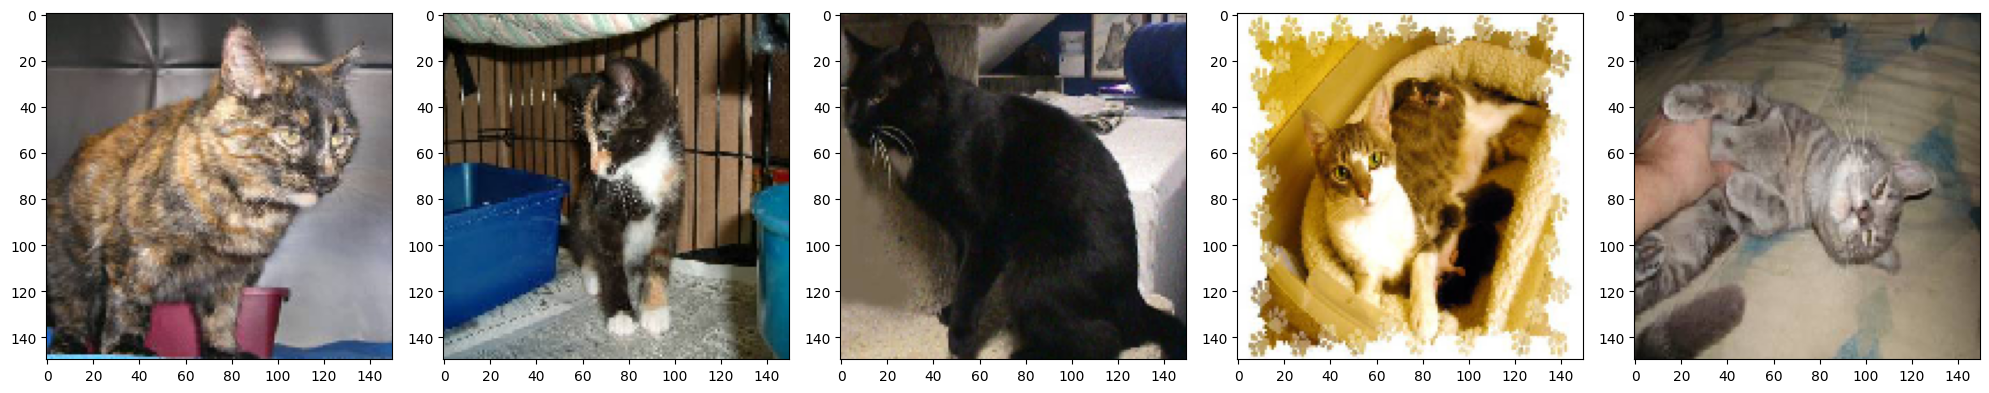

In [ ]:
plotImages(sample_training_images[0:5])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                   validation_data=validation_data_gen,
                   validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 125s 6s/step - loss: 0.7138 - accuracy: 0.4885 - val_loss: 0.7378 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 117s 6s/step - loss: 0.6935 - accuracy: 0.5090 - val_loss: 0.7064 - val_accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 116s 6s/step - loss: 0.6882 - accuracy: 0.5310 - val_loss: 0.6087 - val_accuracy: 0.9906
Epoch 4/10
20/20 [==============================] - 117s 6s/step - loss: 0.6811 - accuracy: 0.5505 - val_loss: 0.5321 - val_accuracy: 0.9344
Epoch 5/10
20/20 [==============================] - 121s 6s/step - loss: 0.6471 - accuracy: 0.6230 - val_loss: 0.5593 - val_accuracy: 0.7969
Epoch 6/10
20/20 [==============================] - 115s 6s/step - loss: 0.6199 - accuracy: 0.6560 - val_loss: 0.5653 - val_accuracy: 0.7563
Epoch 7/10
20/20 [==============================] - 114s 6s/step - loss: 0.5967 - accuracy: 0.6845 - val_loss: 0.5637 - val_accuracy: 0.7344
Epoch

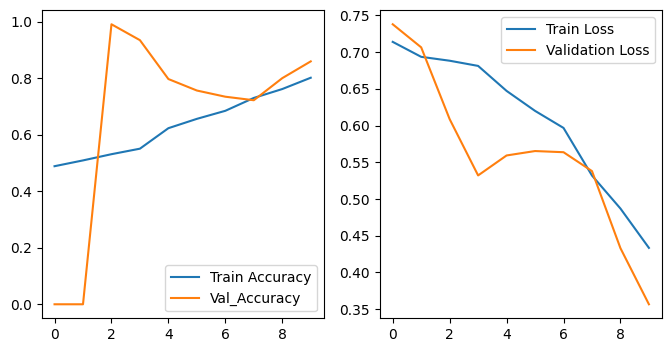

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()

In [ ]:
#Augmentation

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_image = [train_data_gen[0][0][0] for i in range(5)]

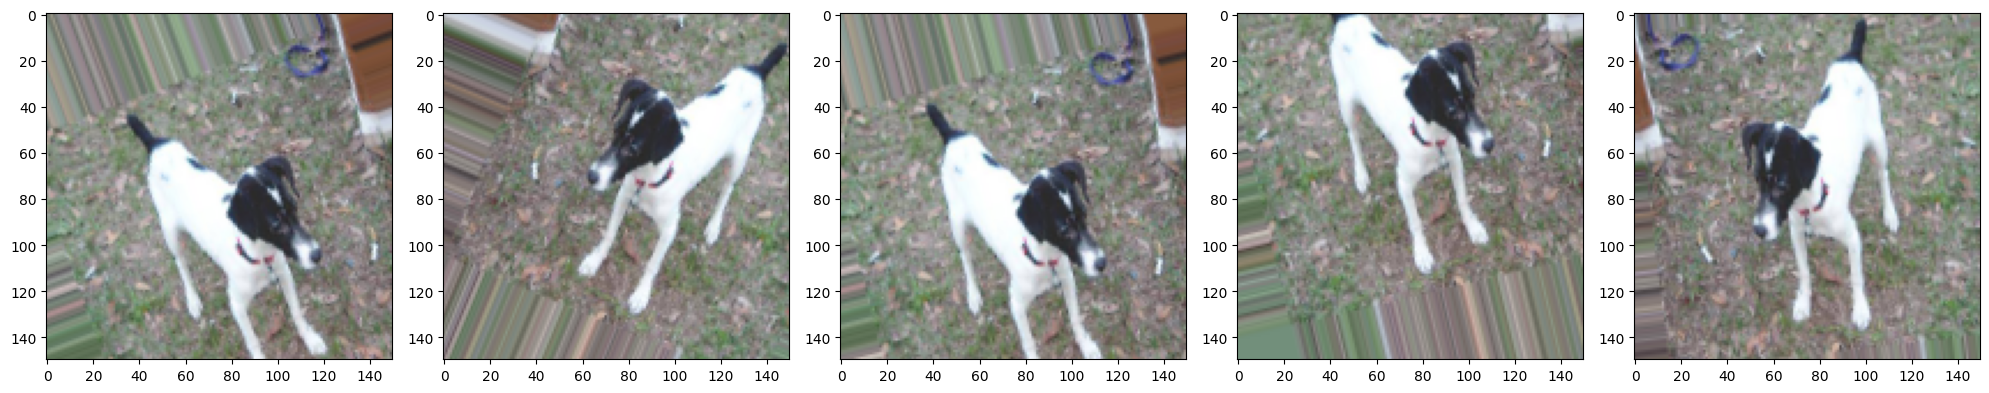

In [ ]:
plotImages(augmented_image)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                   validation_data=validation_data_gen,
                   validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 133s 7s/step - loss: 0.7133 - accuracy: 0.4930 - val_loss: 0.7166 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 132s 6s/step - loss: 0.6920 - accuracy: 0.5220 - val_loss: 0.6703 - val_accuracy: 0.8594
Epoch 3/10
20/20 [==============================] - 129s 6s/step - loss: 0.6875 - accuracy: 0.5390 - val_loss: 0.6646 - val_accuracy: 0.7719
Epoch 4/10
20/20 [==============================] - 124s 6s/step - loss: 0.6721 - accuracy: 0.5640 - val_loss: 0.7459 - val_accuracy: 0.5625
Epoch 5/10
20/20 [==============================] - 127s 6s/step - loss: 0.6709 - accuracy: 0.5660 - val_loss: 0.8280 - val_accuracy: 0.1063
Epoch 6/10
20/20 [==============================] - 131s 6s/step - loss: 0.6587 - accuracy: 0.6155 - val_loss: 0.5709 - val_accuracy: 0.8531
Epoch 7/10
20/20 [==============================] - 129s 6s/step - loss: 0.6429 - accuracy: 0.6125 - val_loss: 0.7528 - val_accuracy: 0.4531
Epoch 8/1

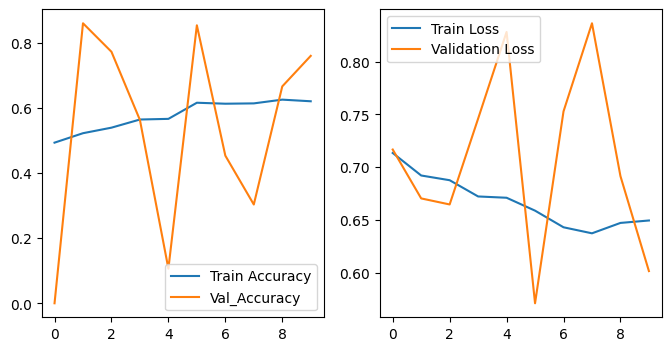

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()